# **Project 1: Multiple linear regression**


## Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats


## Load the Dataset

In [33]:
df=pd.read_csv('/content/cars.csv')
df.shape

(5076, 18)

In [34]:
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Dimensions.Height                                5076 non-null   int64 
 1   Dimensions.Length                                5076 non-null   int64 
 2   Dimensions.Width                                 5076 non-null   int64 
 3   Engine Information.Driveline                     5076 non-null   object
 4   Engine Information.Engine Type                   5076 non-null   object
 5   Engine Information.Hybrid                        5076 non-null   bool  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64 
 7   Engine Information.Transmission                  5076 non-null   object
 8   Fuel Information.City mpg                        5076 non-null   int64 
 9   Fuel Information.Fuel Type               

In [36]:
#numerical_variables
numerical_variables=df.select_dtypes(include=['int64','float64']).columns
numerical_variables

Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.City mpg', 'Fuel Information.Highway mpg',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')

In [37]:
#categorical variables
categorical_variables=df.select_dtypes(include=['object']).columns
categorical_variables

Index(['Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Transmission', 'Fuel Information.Fuel Type',
       'Identification.Classification', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year'],
      dtype='object')

In [38]:
df.describe()


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


## Check for missing values

In [39]:
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64


## Check for Duplicate rows

In [40]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates if any
data = df.drop_duplicates()
print("New dataset dimensions after removing duplicates:", data.shape)


Number of duplicate rows: 18
New dataset dimensions after removing duplicates: (5058, 18)


## Handle Categorical Variables (One-Hot Encoding)

In [41]:
data_encoded = pd.get_dummies(data, columns=categorical_variables, drop_first=True)

# Check the new dataset shape after encoding
print("Shape after encoding categorical variables:", data_encoded.shape)


Shape after encoding categorical variables: (5058, 6553)


In [42]:
target_column = 'Engine Information.Engine Statistics.Horsepower'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]

## Detect Outliers Using IQR Method


In [43]:
# Define a function to detect outliers using IQR
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# Detect outliers
outliers = detect_outliers(df[numerical_variables])
print(outliers)


Dimensions.Height                                    0
Dimensions.Length                                    0
Dimensions.Width                                     0
Engine Information.Number of Forward Gears          91
Fuel Information.City mpg                           36
Fuel Information.Highway mpg                        16
Identification.Year                                  0
Engine Information.Engine Statistics.Horsepower    124
Engine Information.Engine Statistics.Torque         36
dtype: int64


In [44]:
# Handle outliers using the IQR method
for col in numerical_variables:
    # Calculate the first quartile (Q1) and the third quartile (Q3)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Display the shape of the dataset after removing outliers
print("Data shape after handling outliers:", data.shape)


Data shape after handling outliers: (4794, 18)


## Data Visualization

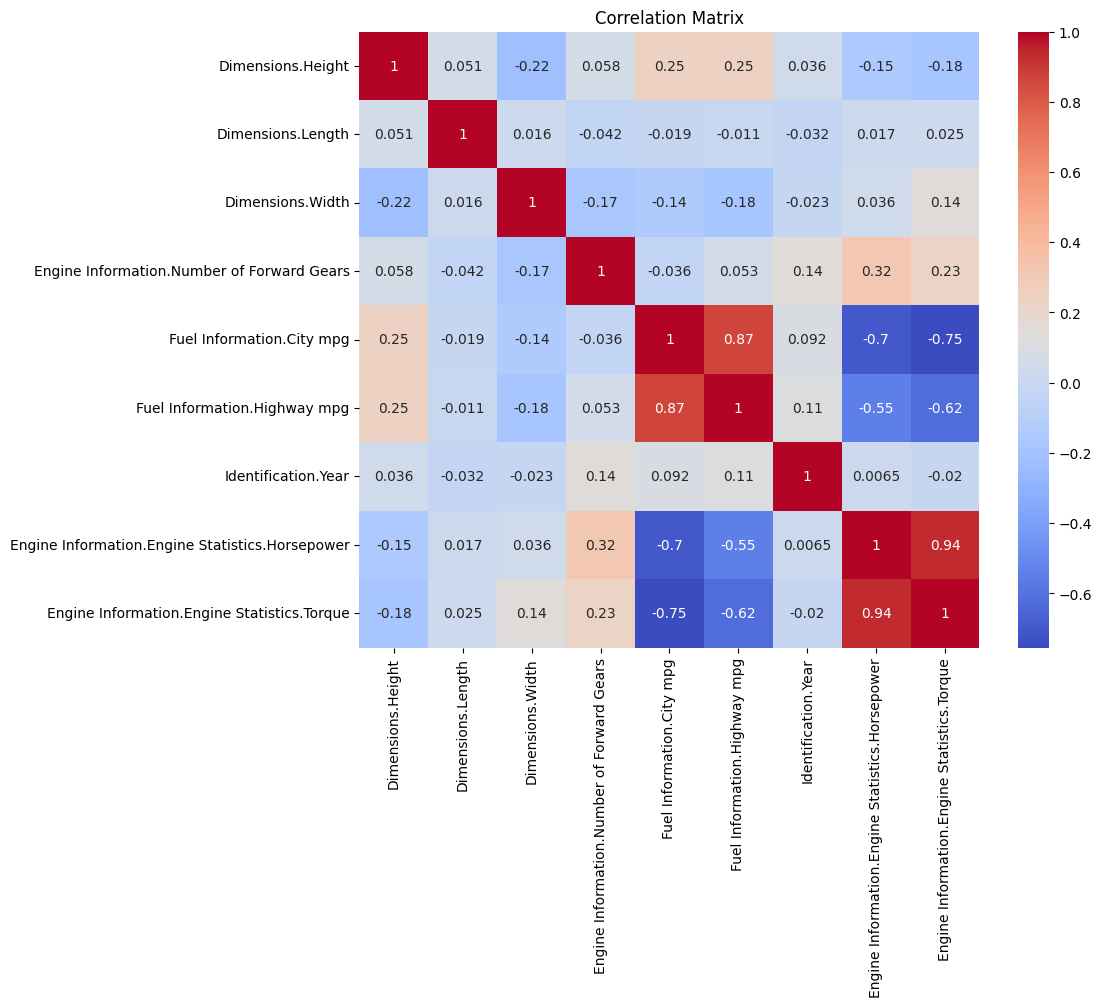

In [46]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_variables].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




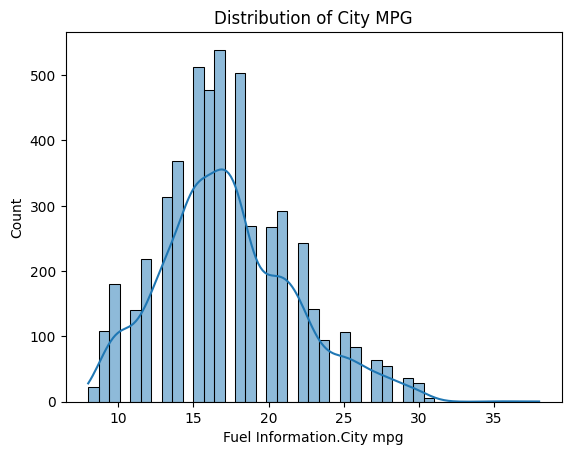

In [47]:
# Distribution of target variable (City MPG)
sns.histplot(df['Fuel Information.City mpg'], kde=True)
plt.title('Distribution of City MPG')
plt.show()

## Feature Scaling(Standardization)

In [48]:
#Feature scaling
scaler=StandardScaler()
data_encoded[numerical_variables]=scaler.fit_transform(data_encoded[numerical_variables])
data_encoded.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,...,Identification.Model Year_2012 Volkswagen Tiguan,Identification.Model Year_2012 Volkswagen Touareg,Identification.Model Year_2012 Volkswagen Touareg Hybrid,Identification.Model Year_2012 Volvo C30,Identification.Model Year_2012 Volvo C70,Identification.Model Year_2012 Volvo S60,Identification.Model Year_2012 Volvo S80,Identification.Model Year_2012 Volvo XC60,Identification.Model Year_2012 Volvo XC70,Identification.Model Year_2012 Volvo XC90
0,-0.091327,0.196527,0.727342,True,0.568546,0.161624,0.134330,-2.386149,-0.215680,-0.366326,...,False,False,False,False,False,False,False,False,False,False
1,-0.091327,0.196527,0.727342,True,0.568546,1.053843,0.596221,-2.386149,-0.740212,-0.655932,...,False,False,False,False,False,False,False,False,False,False
2,-0.091327,0.196527,0.727342,True,0.568546,0.830788,0.904148,-2.386149,-0.740212,-0.655932,...,False,False,False,False,False,False,False,False,False,False
3,-0.091327,0.196527,0.727342,True,0.568546,0.830788,0.596221,-2.386149,-0.740212,-0.655932,...,False,False,False,False,False,False,False,False,False,False
5,-0.879249,-1.432955,-1.023792,True,0.568546,-0.284485,0.442257,-2.386149,-0.058321,-0.296421,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# Define independent variables (X)
X = df[[
    "Dimensions.Height", "Dimensions.Length", "Dimensions.Width",
    "Engine Information.Number of Forward Gears", "Fuel Information.City mpg","Fuel Information.Highway mpg",
    "Engine Information.Engine Statistics.Torque"
]]

# Standardize the data (optional but improves VIF accuracy)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display VIF values
print("Variance Inflation Factor (VIF):\n", vif_data)

Variance Inflation Factor (VIF):
                                        Feature       VIF
0                            Dimensions.Height  1.115015
1                            Dimensions.Length  1.007300
2                             Dimensions.Width  1.114637
3   Engine Information.Number of Forward Gears  1.171782
4                    Fuel Information.City mpg  5.865903
5                 Fuel Information.Highway mpg  4.168623
6  Engine Information.Engine Statistics.Torque  2.611167


## Correlation Analysis and Multicollinearity Check for Feature Selection

In [50]:
# Check correlation between 'City mpg' and 'Highway mpg'
corr = df[["Fuel Information.City mpg", "Fuel Information.Highway mpg"]].corr()
print("Correlation between City mpg and Highway mpg:\n", corr)


Correlation between City mpg and Highway mpg:
                               Fuel Information.City mpg  \
Fuel Information.City mpg                      1.000000   
Fuel Information.Highway mpg                   0.865617   

                              Fuel Information.Highway mpg  
Fuel Information.City mpg                         0.865617  
Fuel Information.Highway mpg                      1.000000  


In [51]:
# Drop the correlated feature 'Fuel Information.Highway mpg'
X = df[[
    "Dimensions.Height", "Dimensions.Length", "Dimensions.Width",
    "Engine Information.Number of Forward Gears", "Fuel Information.City mpg",
    "Engine Information.Engine Statistics.Torque"
]]


In [52]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [53]:
# Compute new VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("Updated VIF values:\n", vif_data)


Updated VIF values:
                                        Feature       VIF
0                            Dimensions.Height  1.113930
1                            Dimensions.Length  1.007080
2                             Dimensions.Width  1.104458
3   Engine Information.Number of Forward Gears  1.154934
4                    Fuel Information.City mpg  2.493356
5  Engine Information.Engine Statistics.Torque  2.598046


## Train-Test Split

In [54]:
# Define the independent (X) and dependent (y) variables
X = data_encoded.drop('Fuel Information.City mpg', axis=1)  # Dropping the target variable 'City mpg'
y = data_encoded['Fuel Information.City mpg']  # The target variable
X_scaled = scaler.fit_transform(X)
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Build and Train the Regression Model

In [55]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [56]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Experiment with different alpha values
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

## Model Evaluation

Training R^2: 0.9999958560745453
Test R^2: 0.9449873220957516
Training RMSE: 0.0020245937292896745
Test RMSE: 0.23954949884358945


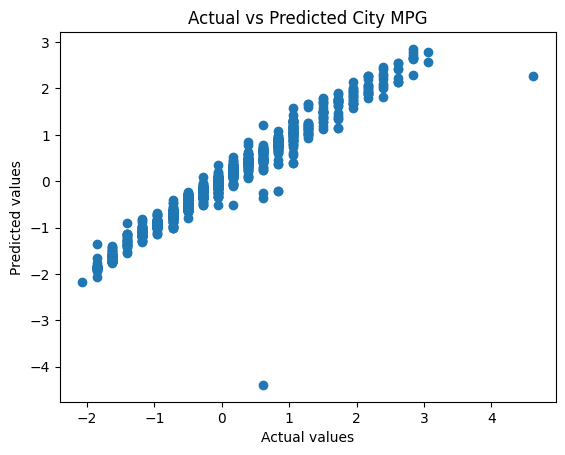

In [57]:
# Make predictions on the training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
print('Training R^2:', r2_score(y_train, y_pred_train))
print('Test R^2:', r2_score(y_test, y_pred_test))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Actual vs Predicted plot
plt.scatter(y_test, y_pred_test)
plt.title('Actual vs Predicted City MPG')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## Residual Diagnostics

### Residuals vs Fitted Plot (Homoscedasticity Check):

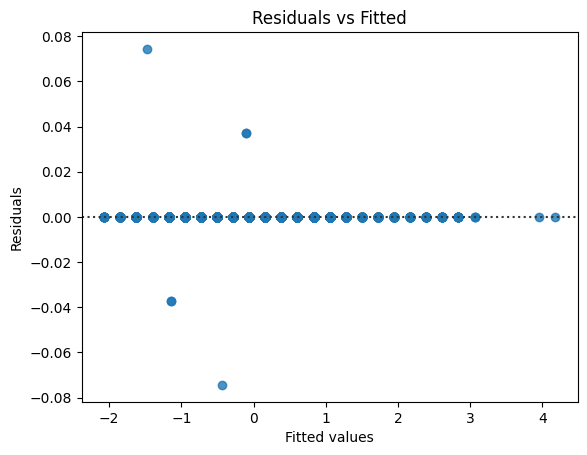

In [58]:
# Residual plot (homoscedasticity check)
residuals = y_train - y_pred_train
sns.residplot(x=y_pred_train, y=residuals)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


### Q-Q Plot (Normality Check)

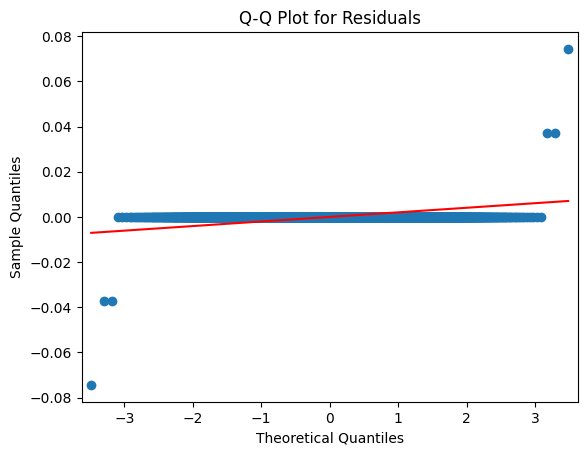

In [59]:
# Q-Q plot for residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for Residuals')
plt.show()


### Durbin-Watson Test (Independence of Residuals)

In [60]:
# Durbin-Watson test for autocorrelation in residuals
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print('Durbin-Watson:', dw)


Durbin-Watson: 1.9999999999999514
